In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
import graphviz 
import sklearn.model_selection as model_selection
from matplotlib import colors
from sklearn.svm import SVC
from sklearn import svm

# Decision Trees
For decision trees we use: scikit-learn.org/stable/modules/tree.html


In [2]:

#Loading data sets
X,Y = load_svmlight_file("../datasets/gisette_scale.bz2")
test_X,test_Y = load_svmlight_file("../datasets/gisette_scale.t.bz2")


#Partition: each new training set is half of the original
X_1, X_2, y_1, y_2 = model_selection.train_test_split(X, Y, test_size=0.5, random_state=1)


#Calling the function, training the first tree: Note we don't use maximum depth
clf = tree.DecisionTreeClassifier()
clf_1 = clf.fit(X_1, y_1)

#Total classification error: 1 - accuracy
error_1 = 1- clf_1.score(test_X, test_Y)


#Plotting the first tree
dot_data_1 = tree.export_graphviz(clf_1, out_file=None,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph_1 = graphviz.Source(dot_data_1)  
graph_1.render("tree1") 
                
                
#Repeat all for the second tree
clf_2 = clf.fit(X_2, y_2)
error_2 = 1- clf_2.score(test_X,test_Y)

dot_data_2 = tree.export_graphviz(clf_2, out_file=None,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph_2 = graphviz.Source(dot_data_2)  
graph_2.render("tree2") 



print("Total classification error. Tree 1: %0.3f Tree 2: %0.3f" % (error_1,error_2))

Total classification error. Tree 1: 0.096 Tree 2: 0.084


APPPLYING MAXIMUM DEPTH:

In [3]:
#We apply the same partition as before (same random state allows reproducible results)
X_3, X_4, y_3, y_4 = model_selection.train_test_split(X, Y, test_size=0.5, random_state=1)


#We train and plot the third tree. Note: Now we use maximum depth=4
clf = tree.DecisionTreeClassifier(max_depth=4)
clf_3 = clf.fit(X_3, y_3)
error_3 =1- clf_3.score(test_X, test_Y)

dot_data_3 = tree.export_graphviz(clf_3, out_file=None,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph_3 = graphviz.Source(dot_data_3)  
graph_3.render("tree3") 
                
                
#Training and plotting fourth tree
clf_4 = clf.fit(X_4, y_4)
error_4 = 1-clf_4.score(test_X,test_Y)

dot_data_4 = tree.export_graphviz(clf_4, out_file=None,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph_4 = graphviz.Source(dot_data_4)  
graph_4.render("tree4") 



print("Total classification error. Tree 3: %0.3f Tree 4: %0.3f" % (error_3,error_4))

Total classification error. Tree 3: 0.092 Tree 4: 0.089


# SVMs

For SVMs we use: scikit-learn.org/stable/modules/svm.html


In [8]:
#Loading the data: training and testing sets
X,y = load_svmlight_file("../datasets/gisette_scale.bz2")
test_X,test_Y = load_svmlight_file("../datasets/gisette_scale.t.bz2")

#We partition the training set in order to obtain a few values(20%) for the study of the cross validation error
X_crossval, X_2, y_crossval, y_2 = model_selection.train_test_split(X, y, test_size=0.8, random_state=1)


#Define ranges for the parameters, we use logarithmic ranges
c_range = np.logspace(-2,9,12)
gamma_range = np.logspace(-12,-1,12)

#Define parameters for the grid search
parameters = [{'kernel': ['rbf'], 'gamma': gamma_range,'C': c_range}]

#Apply grid search
clf = model_selection.GridSearchCV(SVC(), parameters, scoring='accuracy')
clf.fit(X_crossval, y_crossval)


#Provide the combination of parameters that minimizes the error
print("Best parameters: %s, accuracy: %0.3f"
      % (clf.best_params_, clf.best_score_))

C:\Users\emmaf\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters: {'C': 10.0, 'gamma': 0.0001, 'kernel': 'rbf'}, accuracy: 0.964


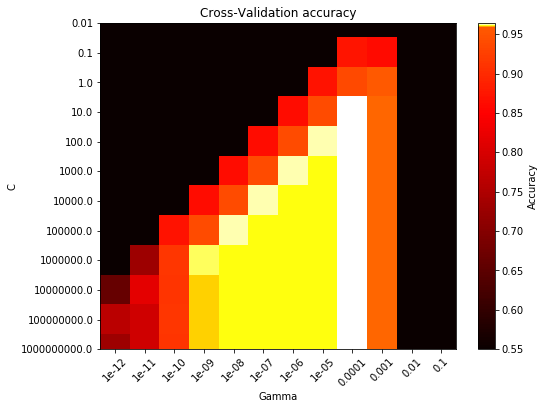

<Figure size 432x288 with 0 Axes>

In [11]:
# Plotting the heatmap for the grid search


#Shape array of results
scores = clf.cv_results_['mean_test_score'].reshape(len(c_range),len(gamma_range))

#In order to re-arrange the color variation near the more populated points
divnorm = colors.DivergingNorm(vmin=0.55, vcenter=0.959)

#Set plot
plt.figure(figsize=(8, 6))
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,norm=divnorm)
plt.title('Cross-Validation accuracy')
plt.xlabel('Gamma')
plt.ylabel('C')
clrb=plt.colorbar()
clrb.set_label('Accuracy')
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(c_range)), c_range)
plt.show()

In [7]:
#We take the best combination of parameters
good_gamma=clf.best_params_['gamma']
good_c = clf.best_params_['C']


#We run the SVM with the best parameters on the testing set and obtain the accuracy and error
svm_model = svm.SVC(kernel='rbf',C= good_c, gamma= good_gamma)
svm_model = svm_model.fit(X, y)
accuracy = svm_model.score(test_X,test_Y)
error = 1- accuracy

print("Total classification error: %0.3f" % error)

Total classification error: 0.022
